In [1]:
import scipy.special as sp
import numpy as np
import uproot
import csv
import matplotlib.pyplot as plt
import pandas as pd

import Utilities.Constants as Constants
import Utilities.Functions as Functions
from Utilities.ipython_exit import exit

print("Success")

Success


## Equation to replicate
The first attempt comes from an equation in the HNL to e+e- recast of HPS decays in MicroBooNE paper: https://arxiv.org/abs/2106.06548

This has an equation for Majorana HNLs with the HNL mass << muon mass.

There are also equations from https://arxiv.org/pdf/0901.3589.pdf on pages 48/49

In [ ]:
#Constants
s_W_squared = 0.231 #sin squared Weinberg, Taken from Wikipedia, rough
G_F = 1.1663787e-5 #GeV-2 Fermi couplingconst, Taken from Jinst

In [ ]:
# Define a function here, which takes the variables U_mu4 and HNL mass.
# Doing all in GeV

N_mass = 0.1 #100 MeV
U_mu4 = 1e-4
Decay_width_2lep = (2*(G_F**2)*(U_mu4**2)*(N_mass**5)/(768*np.pi**3))*(1-4*s_W_squared+8*s_W_squared**2)


In [ ]:
Decay_width_3nu = G_F**2/(96*np.pi**3)*(U_mu4**2)*(N_mass**5) #comes from "The search for heavy majorana neutrinos"

## Genie HNL generator comparison

In [2]:
def get_interpolated_vals(x, y, x_vals_wanted):
    y_interp = np.interp(x_vals_wanted, x, y)

    return y_interp

def get_ratio(arr1,arr2):
    ratio = np.divide(np.array(arr1), np.array(arr2))
    return ratio

In [4]:
filename = "Branching_ratios/new_fixed_factor_feb14/SCAN_again.log"

with open(filename) as f:
    lines = f.readlines()

nu_channel_majorana, nu_channel_dirac = [], []
eplus_eminus_channel, eplus_eminus_channel_dirac = [], []
e_mu_channel_majorana, e_mu_channel_dirac = [], []
pi0_channel, pi0_channel_dirac = [], []
e_pi_channel_majorana, e_pi_channel_dirac = [], []
mu_mu_channel_majorana, mu_mu_channel_dirac = [], []
mu_pi_channel_majorana, mu_pi_channel_dirac = [], []

lifetime_majorana, lifetime_dirac = [], []

counter = 0
mass_start_point = 0.001 #GeV
mass_list = []
for line in lines:
    if ("Channel 0" in line) and ((counter+23) % 32 == 0): #3nu
        br_value = float(line.split(" ")[-1])
        nu_channel_majorana.append(br_value)
        mass = mass_start_point*len(nu_channel_majorana)
        mass_list.append(mass)
    if ("Channel 1" in line) and ((counter+22) % 32 == 0): #nuee
        br_value = float(line.split(" ")[-1])
        eplus_eminus_channel.append(br_value)
    if ("Channel 2" in line) and ((counter+21) % 32 == 0): #numue
        br_value = float(line.split(" ")[-1])
        e_mu_channel_majorana.append(br_value)
    if ("Channel 3" in line) and ((counter+20) % 32 == 0): #nupi0
        br_value = float(line.split(" ")[-1])
        pi0_channel.append(br_value)
    if ("Channel 4" in line) and ((counter+19) % 32 == 0): #epi
        br_value = float(line.split(" ")[-1])
        e_pi_channel_majorana.append(br_value)
    if ("Channel 5" in line) and ((counter+18) % 32 == 0): #numumu
        br_value = float(line.split(" ")[-1])
        mu_mu_channel_majorana.append(br_value)
    if ("Channel 6" in line) and ((counter+17) % 32 == 0): #mupi
        br_value = float(line.split(" ")[-1])
        mu_pi_channel_majorana.append(br_value)
    if ("lifetime" in line) and ((counter+24) % 32 == 0):
        lifetime_val = float(line.split(" ")[-1])
        lifetime_majorana.append(lifetime_val)
        
    if ("Channel 0" in line) and ((counter+31) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        nu_channel_dirac.append(br_value)
    if ("Channel 1" in line) and ((counter+30) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        eplus_eminus_channel_dirac.append(br_value) 
    if ("Channel 2" in line) and ((counter+29) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        e_mu_channel_dirac.append(br_value) 
    if ("Channel 3" in line) and ((counter+28) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        pi0_channel_dirac.append(br_value)
    if ("Channel 4" in line) and ((counter+27) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        e_pi_channel_dirac.append(br_value)
    if ("Channel 5" in line) and ((counter+26) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        mu_mu_channel_dirac.append(br_value)
    if ("Channel 6" in line) and ((counter+25) % 32 == 0):
        br_value = float(line.split(" ")[-1])
        mu_pi_channel_dirac.append(br_value)
    if ("lifetime" in line) and ((counter+32) % 32 == 0):
        lifetime_val = float(line.split(" ")[-1])
        lifetime_dirac.append(lifetime_val)
    counter += 1
    
print(counter)
print(len(mass_list))
print(len(lifetime_majorana))
print(len(lifetime_dirac))
BR_list_maj = [nu_channel_majorana, eplus_eminus_channel, e_mu_channel_majorana, pi0_channel, e_pi_channel_majorana, mu_mu_channel_majorana, mu_pi_channel_majorana]
BR_list_dir = [nu_channel_dirac, eplus_eminus_channel_dirac, e_mu_channel_dirac, pi0_channel_dirac, 
               e_pi_channel_dirac, mu_mu_channel_dirac, mu_pi_channel_dirac]

for l in BR_list_maj:
    print(len(l))
for m in BR_list_dir:
    print(len(m))

16000
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500


In [6]:
print(type(np.array(mass_list)))
mass_for_df = np.array(mass_list)
lifetime_for_df = np.array(lifetime_dirac)
three_nu_for_df = np.array(nu_channel_dirac)
ee_for_df = np.array(eplus_eminus_channel_dirac)
e_mu_for_df = np.array(e_mu_channel_dirac)
pi0_for_df = np.array(pi0_channel_dirac)
e_pi_for_df = np.array(e_pi_channel_dirac)
mu_mu_for_df = np.array(mu_mu_channel_dirac)
mu_pi_for_df = np.array(mu_pi_channel_dirac)

dict_for_dirac = {"mass":mass_for_df, "lifetime":lifetime_for_df, "BR_3nu":three_nu_for_df, "BR_e+e-":ee_for_df, "BR_nu_pi0":pi0_for_df,
                     "BR_e_mu":e_mu_for_df,"BR_e_pi":e_pi_for_df, "BR_mu_mu":mu_mu_for_df, "BR_mu_pi":mu_pi_for_df}

df_dirac = pd.DataFrame(dict_for_dirac)
df_dirac.to_csv("Branching_ratios/new_fixed_factor_feb14/Genie_Dirac_new.csv")
df_dirac.head()

<class 'numpy.ndarray'>


,mass,lifetime,BR_3nu,BR_e+e-,BR_nu_pi0,BR_e_mu,BR_e_pi,BR_mu_mu,BR_mu_pi
0,0.001,2.880240e+21,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.002,8.707880e+19,0.967461,0.032539,0.0,0.0,0.0,0.0,0.0
2,0.003,1.106210e+19,0.933290,0.066710,0.0,0.0,0.0,0.0,0.0
3,0.004,2.576370e+18,0.915965,0.084035,0.0,0.0,0.0,0.0,0.0
4,0.005,8.359870e+17,0.907028,0.092972,0.0,0.0,0.0,0.0,0.0


In [5]:
cols = ['Mass','Value']
Davide_ee = pd.read_csv("Branching_ratios/Davide_ee_mu_like.csv",names=cols)
Davide_pi0 = pd.read_csv("Branching_ratios/Davide_pi0_mu_like.csv",names=cols)

cols_Pawel_new = ["mass", "lifetime [ns]", "BR 3nu", "BR epi", "BR mupi", "BR nupi0", "BR nue+e-", 
                  "BR e+mu-", "BR e-mu+", "BR mu+mu-"]
cols_Genie = ["mass", "lifetime",  "BR e+e-",  "BR nu pi0"]

Pawel_new_maj_mu = pd.read_csv("Branching_ratios/new_fixed_factor_feb14/br_major_mu.txt",names=cols_Pawel_new, sep=" ")
Pawel_new_dir_mu = pd.read_csv("Branching_ratios/new_fixed_factor_feb14/br_dirac_mu.txt",names=cols_Pawel_new, sep=" ")
Genie_new_maj_nu = pd.read_csv("Branching_ratios/new_fixed_factor_feb14/Genie_Majorana_new.csv")
Genie_new_dir_nu = pd.read_csv("Branching_ratios/new_fixed_factor_feb14/Genie_Dirac_new.csv")

DUNE_ee = pd.read_csv("Branching_ratios/DUNE_ND_BR_ee.csv",names=cols)
DUNE_3nu = pd.read_csv("Branching_ratios/DUNE_ND_BR_3nu.csv",names=cols)
DUNE_nupi = pd.read_csv("Branching_ratios/DUNE_ND_BR_nupi.csv",names=cols)

In [10]:
Pawel_new_maj_mu.keys()

Index(['mass', 'lifetime [ns]', 'BR 3nu', 'BR epi', 'BR mupi', 'BR nupi0',
       'BR nue+e-', 'BR e+mu-', 'BR e-mu+', 'BR mu+mu-'],
      dtype='object')

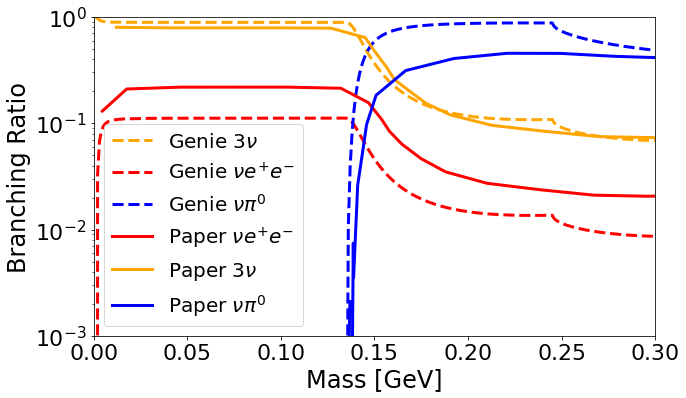

In [7]:
colour_3nu = "orange"
colour_ee = "red"
colour_pi0 = "blue"
plt.rc('font', size=22)
plt.figure(figsize=(10,6))
# plt.title("HNL Generator Branching Ratios (Dirac)", fontsize=24)
# plt.plot(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["BR 3nu"], label = r"$N \rightarrow \nu \nu \nu$", lw=3, color = colour_3nu)
# plt.plot(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["BR nue+e-"], label = r"$N \rightarrow \nu e^{+}e^{-}$", lw=3, color = colour_ee)
# plt.plot(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["BR nupi0"], label = r"$N \rightarrow \nu\pi^{0}$", lw=3, color = colour_pi0)
# plt.plot(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["BR mupi"], label = r"$N \rightarrow \mu\pi$", lw=3, color = "green")

plt.plot(Genie_new_maj_nu["mass"], Genie_new_maj_nu["BR_3nu"], label = r"Genie $3\nu$", lw=3, color = colour_3nu, linestyle="dashed")
plt.plot(Genie_new_maj_nu["mass"], Genie_new_maj_nu["BR_e+e-"], label = r"Genie $\nu e^{+}e^{-}$", lw=3, color = colour_ee, linestyle="dashed")
plt.plot(Genie_new_maj_nu["mass"], Genie_new_maj_nu["BR_nu_pi0"], label = r"Genie $\nu\pi^0$", lw=3, color = colour_pi0, linestyle="dashed")

# plt.plot(Pawel_new_dir_mu["mass"], Pawel_new_dir_mu["BR 3nu"], label = r"Gelato $3\nu$", lw=3, color = colour_3nu)
# plt.plot(Pawel_new_dir_mu["mass"], Pawel_new_dir_mu["BR nue+e-"], label = r"Gelato $\nu e^{+}e^{-}$", lw=3, color = colour_ee)
# plt.plot(Pawel_new_dir_mu["mass"], Pawel_new_dir_mu["BR nupi0"], label = r"Gelato $\nu\pi^{0}$", lw=3, color = colour_pi0)
# plt.plot(Genie_new_dir_nu["mass"], Genie_new_dir_nu["BR_3nu"], label = r"Genie Dirac $3\nu$", lw=3, color = colour_3nu, linestyle="dashed")
# plt.plot(Genie_new_dir_nu["mass"], Genie_new_dir_nu["BR_e+e-"], label = r"Genie Dirac $\nu e^{+}e^{-}$", lw=3, color = colour_ee, linestyle="dashed")
# plt.plot(Genie_new_dir_nu["mass"], Genie_new_dir_nu["BR_nu_pi0"], label = r"Genie Dirac $\nu\pi^0$", lw=3, color = colour_pi0, linestyle="dashed")

plt.plot(DUNE_ee["Mass"], DUNE_ee['Value'], label = r"Paper $\nu e^{+}e^{-}$", lw=3, color = colour_ee)
plt.plot(DUNE_3nu["Mass"], DUNE_3nu['Value'], label = r"Paper $3\nu$", lw=3, color = colour_3nu)
plt.plot(DUNE_nupi["Mass"], DUNE_nupi['Value'], label = r"Paper $\nu\pi^0$", lw=3, color = colour_pi0)

plt.ylim(1e-3,1.0)
plt.xlim(0,0.3)
plt.ylabel("Branching Ratio", fontsize=24)
plt.xlabel("Mass [GeV]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=20, loc="best")
plt.tight_layout()

savename = "BRs_comparison_Genie_paper"
plt.savefig("plots/Generator/"+savename+".pdf")
plt.savefig("plots/Generator/"+savename+".png")

## Lifetimes

In [5]:
x_vals = [0.002,0.010,0.020,0.050,0.100,0.150,0.180,0.200,0.220,0.240,0.245]
BR_Genie_interp = get_interpolated_vals(Genie_new_maj_nu["mass"], Genie_new_maj_nu["lifetime"], x_vals)
BR_Pawel_interp = get_interpolated_vals(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["lifetime [ns]"], x_vals) 

In [6]:
print(BR_Genie_interp)
print(BR_Pawel_interp)

4.09480e+12 #Genie
3.83433e+12 #Pawel

[4.35394e+19 1.28662e+16 4.00357e+14 4.09480e+12 1.27940e+11 6.93121e+09
 1.08211e+09 5.26708e+08 3.04858e+08 1.95503e+08 1.76964e+08]
[4.23273e+19 1.20658e+16 3.75026e+14 3.83433e+12 1.19796e+11 6.70087e+09
 1.05940e+09 5.14409e+08 2.96528e+08 1.88950e+08 1.70740e+08]


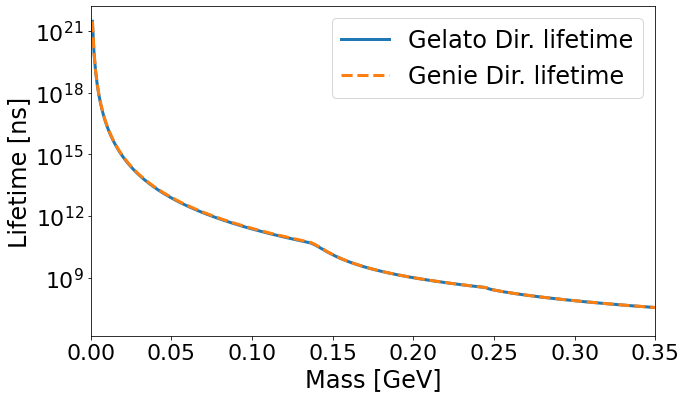

In [28]:
plt.rc('font', size=22)
plt.figure(figsize=(10,6))
# plt.title("HNL Generator Branching Ratios (Dirac)", fontsize=24)
# plt.plot(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["lifetime [ns]"], label = r"Gelato Maj. lifetime", lw=3)
# plt.plot(Genie_new_maj_nu["mass"], Genie_new_maj_nu["lifetime"], label = r"Genie Maj. lifetime", lw=3, linestyle="dashed")
plt.plot(Pawel_new_dir_mu["mass"], Pawel_new_dir_mu["lifetime [ns]"], label = r"Gelato Dir. lifetime", lw=3)
plt.plot(Genie_new_dir_nu["mass"], Genie_new_dir_nu["lifetime"], label = r"Genie Dir. lifetime", lw=3, linestyle="dashed")

# plt.ylim(1e-4,1.0)
plt.xlim(0,0.35)
plt.ylabel("Lifetime [ns]", fontsize=24)
plt.xlabel("Mass [GeV]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=24, loc="upper right")
plt.tight_layout()

savename = "New_Dirac_Lifetimes"
plt.savefig("plots/Generator/"+savename+".pdf")

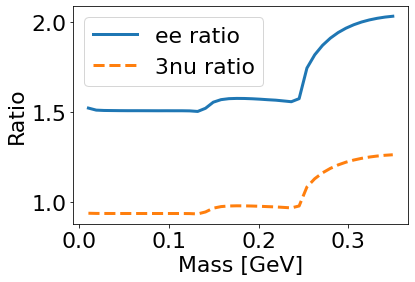

In [11]:
x_vals = np.linspace(0.01, 0.35, 40)
BR_Genie_interp = get_interpolated_vals(Genie_new_maj_nu["mass"], Genie_new_maj_nu["BR_e+e-"], x_vals)
BR_Pawel_interp = get_interpolated_vals(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["BR nue+e-"], x_vals)

BR_Genie_interp_3nu = get_interpolated_vals(Genie_new_maj_nu["mass"], Genie_new_maj_nu["BR_3nu"], x_vals)
BR_Pawel_interp_3nu = get_interpolated_vals(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["BR 3nu"], x_vals)
ratio_ee = get_ratio(BR_Pawel_interp,BR_Genie_interp)
ratio_3nu = get_ratio(BR_Pawel_interp_3nu,BR_Genie_interp_3nu)
perc_diff = []
for i in ratio_ee:
    perc_diff = (1-ratio_ee)*100

plt.plot(x_vals,ratio_ee, lw=3, label="ee ratio")
plt.plot(x_vals,ratio_3nu, lw=3, label="3nu ratio", linestyle="dashed")

# plt.ylim(1.0,2.0)
# plt.plot(x_vals,perc_diff, lw=3)
plt.xlabel("Mass [GeV]")
plt.ylabel("Ratio")
plt.legend()
# plt.ylabel("% difference ee channel")

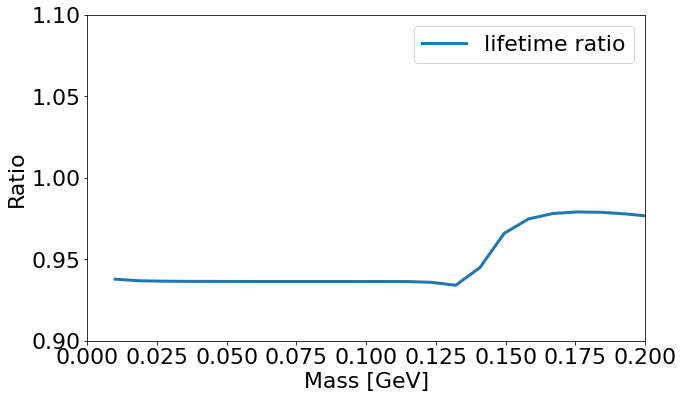

In [11]:
plt.figure(figsize=(10,6))
x_vals = np.linspace(0.01, 0.35, 40)
Lifetime_Genie_interp = get_interpolated_vals(Genie_new_maj_nu["mass"], Genie_new_maj_nu["lifetime"], x_vals)
Lifetime_Pawel_interp = get_interpolated_vals(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["lifetime [ns]"], x_vals)

# BR_Genie_interp_3nu = get_interpolated_vals(Genie_new_maj_nu["mass"], Genie_new_maj_nu["BR_3nu"], x_vals)
# BR_Pawel_interp_3nu = get_interpolated_vals(Pawel_new_maj_mu["mass"], Pawel_new_maj_mu["BR 3nu"], x_vals)
ratio_lifetimes = get_ratio(Lifetime_Pawel_interp,Lifetime_Genie_interp)
perc_diff = []
for i in ratio_lifetimes:
    perc_diff = (1-ratio_lifetimes)*100

plt.plot(x_vals,ratio_lifetimes, lw=3, label="lifetime ratio")

plt.xlim(0,0.2)
plt.ylim(0.9,1.1)
# plt.ylim(1.0,2.0)
# plt.plot(x_vals,perc_diff, lw=3)
plt.xlabel("Mass [GeV]")
plt.ylabel("Ratio")
plt.legend()

## Make sure BRs add up to 1.0

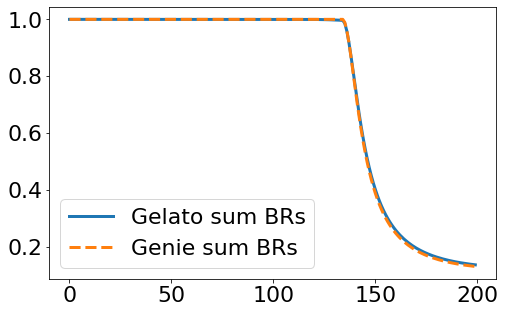

In [25]:
trimmed_Pawel = Pawel_new_maj_mu.head(200).copy()
trimmed_Genie = Genie_new_maj_nu.head(200).copy()

trimmed_Pawel["sum_BRs"] = trimmed_Pawel["BR nue+e-"]+trimmed_Pawel["BR 3nu"]
trimmed_Genie["sum_BRs"] = trimmed_Genie["BR_e+e-"]+trimmed_Genie["BR_3nu"]

plt.figure(figsize=(8,5))
plt.plot(trimmed_Pawel["sum_BRs"], lw=3, label = "Gelato sum BRs")
plt.plot(trimmed_Genie["sum_BRs"], lw=3, linestyle="dashed", label = "Genie sum BRs")
plt.legend()
# for 

In [ ]:
#Dirac BRs etc.
cols_pawel = ["mass",  "BR e+e-",  "BR nu pi0"]
Pawel_BRs = pd.read_csv("Branching_ratios/brs_dirac_um4.Pawel.csv",names=cols_pawel, sep=" ")

filename = "Branching_ratios/brs_dirac_mu.GENIE.txt"

with open(filename) as f:
    lines = f.readlines()

eplus_eminus_channel_dirac = []
pi0_channel_dirac = []

counter = 0
mass_start_point = 0.001 #GeV
mass_list_dirac = []
for line in lines:
    if ("Channel 1 BR" in line) and ((counter+3) % 4 == 0):
        br_value = float(line.split(" ")[-1])
        eplus_eminus_channel_dirac.append(br_value)
        mass = mass_start_point*len(eplus_eminus_channel_dirac)
        mass_list_dirac.append(mass) 
    if ("Channel 3 BR" in line) and ((counter+2) % 4 == 0):
        br_value = float(line.split(" ")[-1])
        pi0_channel_dirac.append(br_value)

    counter += 1
        # print(br_value)
print(counter)
print(len(eplus_eminus_channel_dirac))
print(len(pi0_channel_dirac))

In [ ]:
# print(type(np.array(eplus_eminus_channel_dirac)))
# mass_for_df = np.array(Pawel_BRs["mass"])
# ee_for_df = np.array(Pawel_BRs["BR e+e-"])
# pi0_for_df = np.array(Pawel_BRs["BR nu pi0"])
# dict_for_dirac = {"mass":mass_for_df, "BR_e+e-":ee_for_df, "BR_nu_pi0":pi0_for_df}
# # dirac_cols = ["mass",  "BR_e+e-",  "BR_nu_pi0"]
# df_dirac = pd.DataFrame(dict_for_dirac)
# df_dirac.to_csv("Branching_ratios/Pawel_Dirac_BRs.csv")
# df_dirac.head()

In [ ]:
colour_ee = "red"
colour_pi0 = "blue"
plt.rc('font', size=22)
plt.figure(figsize=(10,6))
# plt.title("HNL Generator Branching Ratios (Dirac)", fontsize=24)
plt.plot(Pawel_BRs["mass"], Pawel_BRs["BR e+e-"], label = r"$N \rightarrow \nu e^{+}e^{-}$", lw=3, color = colour_ee)
plt.plot(Pawel_BRs["mass"], Pawel_BRs["BR nu pi0"], label = r"$N \rightarrow \nu\pi^{0}$", lw=3, color = colour_pi0)
# plt.plot(mass_list_dirac, eplus_eminus_channel_dirac, label = r"Genie $\nu e^+e^-$", lw=3, color = colour_ee, linestyle="dashed")
# plt.plot(mass_list_dirac, pi0_channel_dirac, label = r"Genie $\nu\pi^0$", lw=3, color = colour_pi0, linestyle="dashed")
plt.ylim(1e-4,1.0)
# plt.xlim(0,0.35)
plt.ylabel("Branching Ratio", fontsize=24)
plt.xlabel("Mass [GeV]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=24, loc="lower right")
plt.tight_layout()

savename = "Dirac_HNL_Pawel_Gen_BRs"
plt.savefig("plots/Generator/"+savename+".pdf")

In [ ]:
# 6000 lines in this file from Pawel 
filename = "../Genie_HNLGen/SCAN.log"

with open(filename) as f:
    lines = f.readlines()

eplus_eminus_channel = []
pi0_channel = []

lifetimes = []

counter = 0
mass_start_point = 0.001 #GeV
mass_list = []
for line in lines:
    if ("Channel 1 BR" in line) and ((counter+8) % 12 == 0):
        br_value = float(line.split(" ")[-1])
        eplus_eminus_channel.append(br_value)
        mass = mass_start_point*len(eplus_eminus_channel)
        mass_list.append(mass) 
    if ("Channel 3 BR" in line) and ((counter+7) % 12 == 0):
        br_value = float(line.split(" ")[-1])
        pi0_channel.append(br_value)
    if ("lifetime" in line) and ((counter+9) % 12 == 0):
        lifetime_val = float(line.split(" ")[-1])
        lifetimes.append(lifetime_val)
    counter += 1
        # print(br_value)


In [ ]:
# mass_for_df = np.array(mass_list)
# ee_for_df = np.array(eplus_eminus_channel)
# pi0_for_df = np.array(pi0_channel)
# dict_for_dirac = {"mass":mass_for_df, "BR_e+e-":ee_for_df, "BR_nu_pi0":pi0_for_df}
# # dirac_cols = ["mass",  "BR_e+e-",  "BR_nu_pi0"]
# df_dirac = pd.DataFrame(dict_for_dirac)
# df_dirac.to_csv("Branching_ratios/Genie_Majorana_BRs.csv")

## Plotting the Branching ratios

In [ ]:
colour_ee = "red"
colour_pi0 = "blue"
plt.rc('font', size=22)
plt.figure(figsize=(10,6))
plt.title("HNL Generator Branching Ratios (Majorana)", fontsize=24)
plt.plot(mass_list, eplus_eminus_channel, label = r"Genie $\nu e^+e^-$", lw=3, color = colour_ee)
plt.plot(mass_list, pi0_channel, label = r"Genie $\nu\pi^0$", lw=3, color = colour_pi0)
plt.plot(Davide_ee['Mass'], Davide_ee['Value'], label = r"Davide $\nu e^+e^-$", lw=3, color = colour_ee, linestyle="dashed")
plt.plot(Davide_pi0['Mass'], Davide_pi0['Value'], label = r"Davide $\nu\pi^0$", lw=3, color = colour_pi0, linestyle="dashed")
plt.ylim(1e-4,1.0)
plt.ylabel("BR", fontsize=24)
plt.xlabel("Mass [GeV]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=20, loc="lower right")
plt.tight_layout()

savename = "Majorana_HNL_Gen_BRs"
plt.savefig("plots/Generator/"+savename+".pdf")

## Make ratio of BRs

In [ ]:
x_vals = np.linspace(0.01, 0.35, 20)
BR_Genie_interp = get_interpolated_vals(mass_list_dirac, eplus_eminus_channel_dirac, x_vals)
BR_Pawel_interp = get_interpolated_vals(Pawel_BRs['mass'], Pawel_BRs["BR e+e-"], x_vals)
ratio = get_ratio(BR_Pawel_interp,BR_Genie_interp)
perc_diff = []
for i in ratio:
    perc_diff = (1-ratio)*100

# plt.plot(x_vals,ratio)
plt.plot(x_vals,perc_diff, lw=3)
plt.xlabel("Mass [GeV]")
plt.ylabel("% difference ee channel")
# plt.xlim(0,0.1)
# plt.ylim(1.8,2.2)

In [ ]:
x_vals = np.linspace(0.01, 0.5, 40)
BR_Genie_interp = get_interpolated_vals(mass_list, eplus_eminus_channel, x_vals)
BR_Davide_interp = get_interpolated_vals(Davide_ee['Mass'], Davide_ee['Value'], x_vals)
ratio = get_ratio(BR_Davide_interp,BR_Genie_interp)

plt.plot(x_vals,ratio)
plt.xlabel("Mass [GeV]")
plt.ylabel("Ratio")
plt.xlim(0,0.1)
plt.ylim(1.8,2.2)

## Lifetime plot

In [ ]:
plt.rc('font', size=22)
plt.figure(figsize=(10,6))
plt.title("HNL Generator Lifetimes", fontsize=24)
plt.plot(mass_list, lifetimes, label = r"Lifetime", lw=3)
# plt.ylim(1e-3,1.0)
plt.ylabel("Lifetime", fontsize=24)
plt.xlabel("Mass [GeV]", fontsize=24)
plt.yscale("log")
plt.legend(fontsize=22)
plt.tight_layout()

savename = "Genie_HNL_Gen_lifetime"
plt.savefig("plots/Generator/"+savename+".pdf")